In [10]:
#importing the neccesary libs
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm,_get_covariance
from statsmodels.stats.multicomp import MultiComparison,pairwise_tukeyhsd
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Problem 1 A: 

Salary is hypothesized to depend on educational qualification and occupation. To understand the dependency, the salaries of 40 individuals [SalaryData.csv] are collected and each person’s educational qualification and occupation are noted. Educational qualification is at three levels, High school graduate, Bachelor, and Doctorate. Occupation is at four levels, Administrative and clerical, Sales, Professional or specialty, and Executive or managerial. A different number of observations are in each level of education – occupation combination.

### Exploring the data: 

In [11]:
df_salary=pd.read_csv('SalaryData.csv')
df_salary.head()

Education     Occupation  Salary
0   Doctorate   Adm-clerical  153197
1   Doctorate   Adm-clerical  115945
2   Doctorate   Adm-clerical  175935
3   Doctorate   Adm-clerical  220754
4   Doctorate          Sales  170769

In [12]:
df_salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Education   40 non-null     object
 1   Occupation  40 non-null     object
 2   Salary      40 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.1+ KB


In [13]:
df_salary.Education.value_counts()

 Doctorate    16
 Bachelors    15
 HS-grad       9
Name: Education, dtype: int64

In [14]:
df_salary.Occupation.value_counts()

 Prof-specialty     13
 Sales              12
 Adm-clerical       10
 Exec-managerial     5
Name: Occupation, dtype: int64

## 1. State the null and the alternate hypothesis for conducting one-way ANOVA for both Education and Occupation individually.

Education :

$H_{0}$: The mean salary for all education level is same

$H_{a}$: The mean salary is different for atleast one of the category in education

Occupation :

$H_{0}$: The mean salary for all occupation level is same

$H_{a}$: The mean salary is different for atleast one of the category in occupation

## 2. Perform a one-way ANOVA on Salary with respect to Education. State whether the null hypothesis is accepted or rejected based on the ANOVA results. 

In [15]:
df_salary.Education=pd.Categorical(df_salary.Education)
model=ols(formula='Salary~C(Education)',data=df_salary).fit()
anova_lm(model)

df        sum_sq       mean_sq         F        PR(>F)
C(Education)   2.0  1.026955e+11  5.134773e+10  30.95628  1.257709e-08
Residual      37.0  6.137256e+10  1.658718e+09       NaN           NaN

P_value (1.257709e-08) is less than the alpha value(0.05) which means we have enough evidence to reject Ho.

Rejecting the Ho , we can conclude there is difference in the mean salary within the different levels of education


## 3.Perform a one-way ANOVA on Salary with respect to Occupation. State whether the null hypothesis is accepted or rejected based on the ANOVA results.
 

In [16]:
df_salary.Occupation=pd.Categorical(df_salary.Occupation)
formula='Salary~C(Occupation)'
model=ols(formula,df_salary).fit()
anova_lm(model)

df        sum_sq       mean_sq         F    PR(>F)
C(Occupation)   3.0  1.125878e+10  3.752928e+09  0.884144  0.458508
Residual       36.0  1.528092e+11  4.244701e+09       NaN       NaN

P_value (0.458508) is greater than the alpha value (0.05) , we do not have enough evidence to reject the Ho.

Accepting the Ho , we can conclude there is no significant difference in the mean salary obtained by different occupations

## 4 .If the null hypothesis is rejected in either (2) or in (3), find out which class means are significantly different. Interpret the result. (Non-Graded) 

As we can see the null hypothesis is rejected for education , to find the group with significant difference we can do a post hoc test.TurkeyHSD is used in the following case for multiple comparison

In [17]:
mc=MultiComparison(df_salary.Salary,df_salary.Education)


In [18]:
mc.tukeyhsd(0.05).summary()

<class 'statsmodels.iolib.table.SimpleTable'>

From the above table we can see all the 3 groups have a significant difference in their mean of salary.

# Problem 1B: 

## 1.What is the interaction between two treatments? Analyze the effects of one variable on the other (Education and Occupation) with the help of an interaction plot.[hint: use the ‘pointplot’ function from the ‘seaborn’ function] 

Text(0.5, 1.0, 'Count of Occupation on Education')

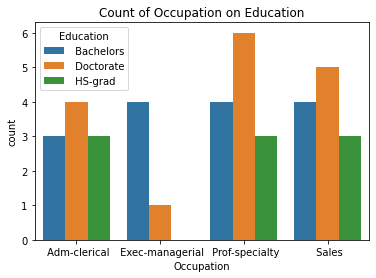

In [96]:

sns.countplot(data=df_salary,hue='Education',x='Occupation')
plt.title('Count of Occupation on Education')

Text(0.5, 1.0, 'Occupation vs Salary')

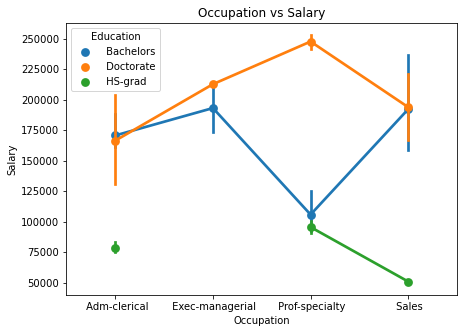

In [100]:
plt.figure(figsize=(7,5))
sns.pointplot(data=df_salary,y='Salary',hue='Education',x='Occupation')
plt.title('Occupation vs Salary')

Students who have done Hs_grad has the minimum salary across all occupations , Bachelors have the intermediate salary and those who have done Doctorate get the maximum salary in all occupation types. We can clearly see that education plays a vital role in deciding the salary across all occupations. There is a positve linear interaction prsent , higher the education higher the salary

Text(0.5, 1.0, 'Scatter plot on education and Salary')

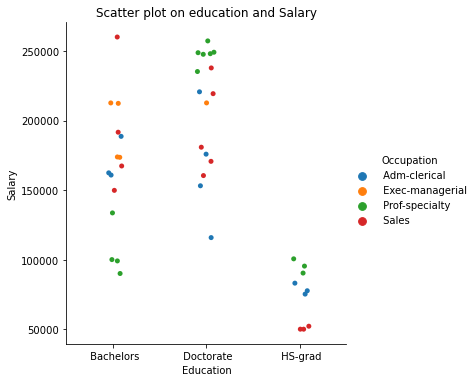

In [101]:
sns.catplot(data=df_salary,x='Education',y='Salary',hue='Occupation')
plt.title('Scatter plot on education and Salary')

People who have done Hs_grad and works as proffesors earn the maximum and those in sales earn the mininmum salary where as in the case of Bachelors proffesors earn the minimum salary and sales people earn the maximum.

People who have done doctorate and works as proffesors has the maximum salary and clerical jobs has the minimum salary.


## 2.Perform a two-way ANOVA based on Salary with respect to both Education and Occupation (along with their interaction Education*Occupation). State the null and alternative hypotheses and state your results. How will you interpret this result? 

$H_{1}$o: The means are same for all groups in the education category

$H_{1}$a: atleast one group has a differtnt mean in the education category

$H_{2}$o : The means are same for all groups in the occupation category

$H_{2}$a : atleast one group has a different mean in the occupation category

$H_{3}$o : There is no interaction effect between education and occupation

$H_{3}$a: There is interaction effect between education and occupation

In [21]:
formula='Salary~C(Education)+ C(Occupation)+ C(Education) :C(Occupation)'
model=ols(formula,df_salary).fit()
anova_lm(model)

df        sum_sq       mean_sq          F  \
C(Education)                 2.0  1.026955e+11  5.134773e+10  72.211958   
C(Occupation)                3.0  5.519946e+09  1.839982e+09   2.587626   
C(Education):C(Occupation)   6.0  3.634909e+10  6.058182e+09   8.519815   
Residual                    29.0  2.062102e+10  7.110697e+08        NaN   

                                  PR(>F)  
C(Education)                5.466264e-12  
C(Occupation)               7.211580e-02  
C(Education):C(Occupation)  2.232500e-05  
Residual                             NaN

As we can see the p value is less for education , occupation and the interaction variable so we can reject the null hypohesis in all three cases. As we have enough statistical evidence to reject the null hypothesis we can conclude atleast one category in education has differnt means and atleast one category in occupation also has different mean. There is a significant interaction present between education and occupation on the salary earned.

## 3.Explain the business implications of performing ANOVA for this particular case study.

Basically we perform ANOVA to find whether there is a significant difference in the mean between the groups. If there is no significant difference it means that particular factor doesnot affect the dependant variable.

In this case we can see anova results show that there is a significant differnece in the groups for education and occupation which means education has a significant effect on the salary so is the occupation, that is salary is affected by education and occupation individually in other words we can conclude the type of education and the occupation we do decides the salary we earn.Anova also gives a third result showing there is a significant interaction present between the education and occupation. This means the presence of education influences the effect of occupation on salary.Education and occupation together affects the salary.


From business point of view we can say that education decides the salary we earn also the occupation we do decides the education. Education along with occupation also affects the salary.

# Problem 2: 

## The dataset Education - Post 12th Standard.csv contains information on various colleges. You are expected to do a Principal Component Analysis for this case study according to the instructions given. The data dictionary of the 'Education - Post 12th Standard.csv' can be found in the following file: Data Dictionary.xlsx. 

## 1.Perform Exploratory Data Analysis [both univariate and multivariate analysis to be performed]. What insight do you draw from the EDA? 

In [22]:
df=pd.read_csv('Education+-+Post+12th+Standard.csv')
df.head()

Names  Apps  Accept  Enroll  Top10perc  Top25perc  \
0  Abilene Christian University  1660    1232     721         23         52   
1            Adelphi University  2186    1924     512         16         29   
2                Adrian College  1428    1097     336         22         50   
3           Agnes Scott College   417     349     137         60         89   
4     Alaska Pacific University   193     146      55         16         44   

   F.Undergrad  P.Undergrad  Outstate  Room.Board  Books  Personal  PhD  \
0         2885          537      7440        3300    450      2200   70   
1         2683         1227     12280        6450    750      1500   29   
2         1036           99     11250        3750    400      1165   53   
3          510           63     12960        5450    450       875   92   
4          249          869      7560        4120    800      1500   76   

   Terminal  S.F.Ratio  perc.alumni  Expend  Grad.Rate  
0        78       18.1           12    7041         60  
1        30       12.2           16   10527         56  
2        66       12.9           30    8735         54  
3        97        7.7           37   19016         59  
4        72       11.9            2   10922         15

In [23]:
dictionary=pd.read_excel('Data Dictionary.xlsx')
dictionary

1)      Names: Names of various university and colleges
0       2)      Apps: Number of applications received     
1     3)      Accept: Number of applications accepted     
2     4)      Enroll: Number of new students enrolled     
3   5)      Top10perc: Percentage of new students ...     
4   6)      Top25perc: Percentage of new students ...     
5   7)      F.Undergrad: Number of full-time under...     
6   8)      P.Undergrad: Number of part-time under...     
7   9)      Outstate: Number of students for whom ...     
8            10)   Room.Board: Cost of Room and board     
9     11)   Books: Estimated book costs for a student     
10  12)   Personal: Estimated personal spending fo...     
11    13)   PhD: Percentage of faculties with Ph.D.’s     
12  14)   Terminal: Percentage of faculties with t...     
13             15)   S.F.Ratio: Student/faculty ratio     
14  16)   perc.alumni: Percentage of alumni who do...     
15  17)   Expend: The Instructional expenditure pe...     
16                   18)   Grad.Rate: Graduation rate

In [24]:
df.shape

(777, 18)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Names        777 non-null    object 
 1   Apps         777 non-null    int64  
 2   Accept       777 non-null    int64  
 3   Enroll       777 non-null    int64  
 4   Top10perc    777 non-null    int64  
 5   Top25perc    777 non-null    int64  
 6   F.Undergrad  777 non-null    int64  
 7   P.Undergrad  777 non-null    int64  
 8   Outstate     777 non-null    int64  
 9   Room.Board   777 non-null    int64  
 10  Books        777 non-null    int64  
 11  Personal     777 non-null    int64  
 12  PhD          777 non-null    int64  
 13  Terminal     777 non-null    int64  
 14  S.F.Ratio    777 non-null    float64
 15  perc.alumni  777 non-null    int64  
 16  Expend       777 non-null    int64  
 17  Grad.Rate    777 non-null    int64  
dtypes: float64(1), int64(16), object(1)
memory usage: 

No missing values found all the columns are continous 16 integer type and 1 float type column is present

In [26]:
df.describe()

Apps        Accept       Enroll   Top10perc   Top25perc  \
count    777.000000    777.000000   777.000000  777.000000  777.000000   
mean    3001.638353   2018.804376   779.972973   27.558559   55.796654   
std     3870.201484   2451.113971   929.176190   17.640364   19.804778   
min       81.000000     72.000000    35.000000    1.000000    9.000000   
25%      776.000000    604.000000   242.000000   15.000000   41.000000   
50%     1558.000000   1110.000000   434.000000   23.000000   54.000000   
75%     3624.000000   2424.000000   902.000000   35.000000   69.000000   
max    48094.000000  26330.000000  6392.000000   96.000000  100.000000   

        F.Undergrad   P.Undergrad      Outstate   Room.Board        Books  \
count    777.000000    777.000000    777.000000   777.000000   777.000000   
mean    3699.907336    855.298584  10440.669241  4357.526384   549.380952   
std     4850.420531   1522.431887   4023.016484  1096.696416   165.105360   
min      139.000000      1.000000   2340.000000  1780.000000    96.000000   
25%      992.000000     95.000000   7320.000000  3597.000000   470.000000   
50%     1707.000000    353.000000   9990.000000  4200.000000   500.000000   
75%     4005.000000    967.000000  12925.000000  5050.000000   600.000000   
max    31643.000000  21836.000000  21700.000000  8124.000000  2340.000000   

          Personal         PhD    Terminal   S.F.Ratio  perc.alumni  \
count   777.000000  777.000000  777.000000  777.000000   777.000000   
mean   1340.642214   72.660232   79.702703   14.089704    22.743887   
std     677.071454   16.328155   14.722359    3.958349    12.391801   
min     250.000000    8.000000   24.000000    2.500000     0.000000   
25%     850.000000   62.000000   71.000000   11.500000    13.000000   
50%    1200.000000   75.000000   82.000000   13.600000    21.000000   
75%    1700.000000   85.000000   92.000000   16.500000    31.000000   
max    6800.000000  103.000000  100.000000   39.800000    64.000000   

             Expend  Grad.Rate  
count    777.000000  777.00000  
mean    9660.171171   65.46332  
std     5221.768440   17.17771  
min     3186.000000   10.00000  
25%     6751.000000   53.00000  
50%     8377.000000   65.00000  
75%    10830.000000   78.00000  
max    56233.000000  118.00000

### Test for Outliers 

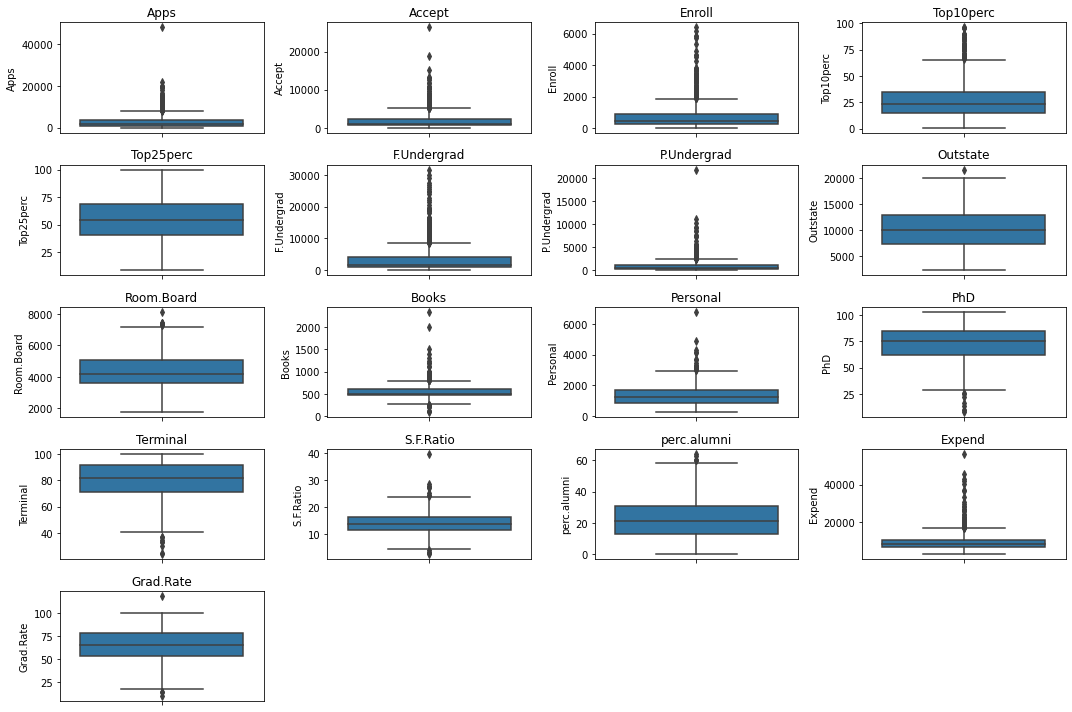

In [27]:
plt.figure(figsize=(15,10))
for i,x in enumerate(df.select_dtypes(exclude='object').columns):
    plt.subplot(5,4,i+1)
    sns.boxplot(y=df[x])
    plt.title('{}'.format(x))
    plt.tight_layout()

Only top 25percent column is free from outliers rest of the columns have outliers

### Colleges with the most application:

Text(0.5, 1.0, 'Colleges with the most number of applications')

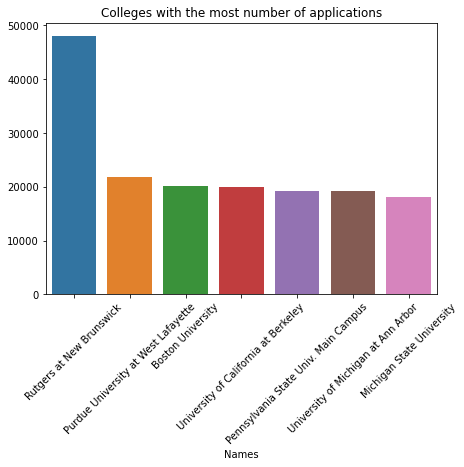

In [103]:
d=df.groupby('Names').sum()['Apps'].sort_values(ascending=False).head(7)
plt.figure(figsize=(7,5))
plt.xticks(rotation=45)
sns.barplot(x=d.index,y=d.values)
plt.title('Colleges with the most number of applications')


### colleges with least applications:

Text(0.5, 1.0, 'Colleges with the least number of applications')

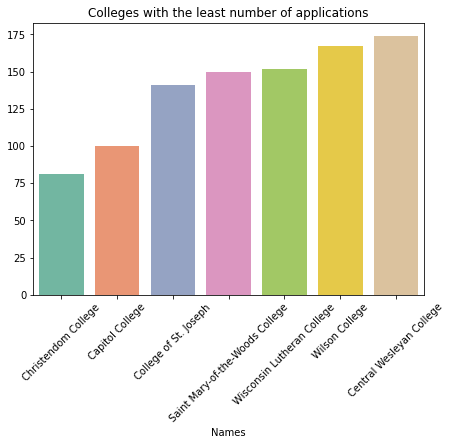

In [104]:
d=df.groupby('Names').sum()['Apps'].sort_values(ascending=True).head(7)
plt.figure(figsize=(7,5))
plt.xticks(rotation=45)
sns.barplot(x=d.index,y=d.values,palette=sns.color_palette("Set2"))
plt.title('Colleges with the least number of applications')

### Colleges preferred by students from top 10 Higher secondary schools:

Text(0.5, 1.0, 'Colleges preferred by top 10 High school students')

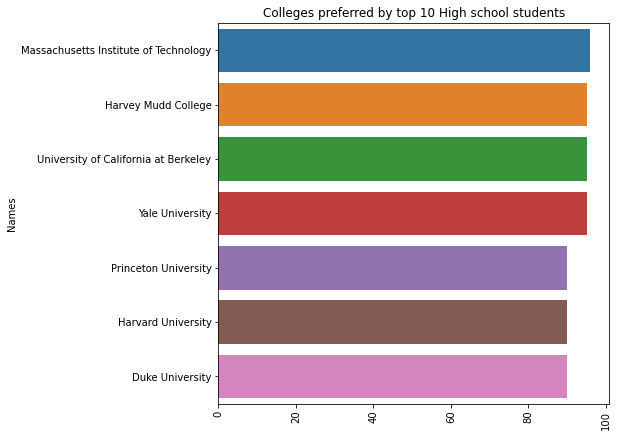

In [105]:
d=df.groupby('Names').sum()['Top10perc'].sort_values(ascending=False).head(7)
plt.figure(figsize=(7,7))
plt.xticks(rotation=90)
sns.barplot(y=d.index,x=d.values,orient='h')
plt.title('Colleges preferred by top 10 High school students')

<Figure size 1440x1440 with 0 Axes>

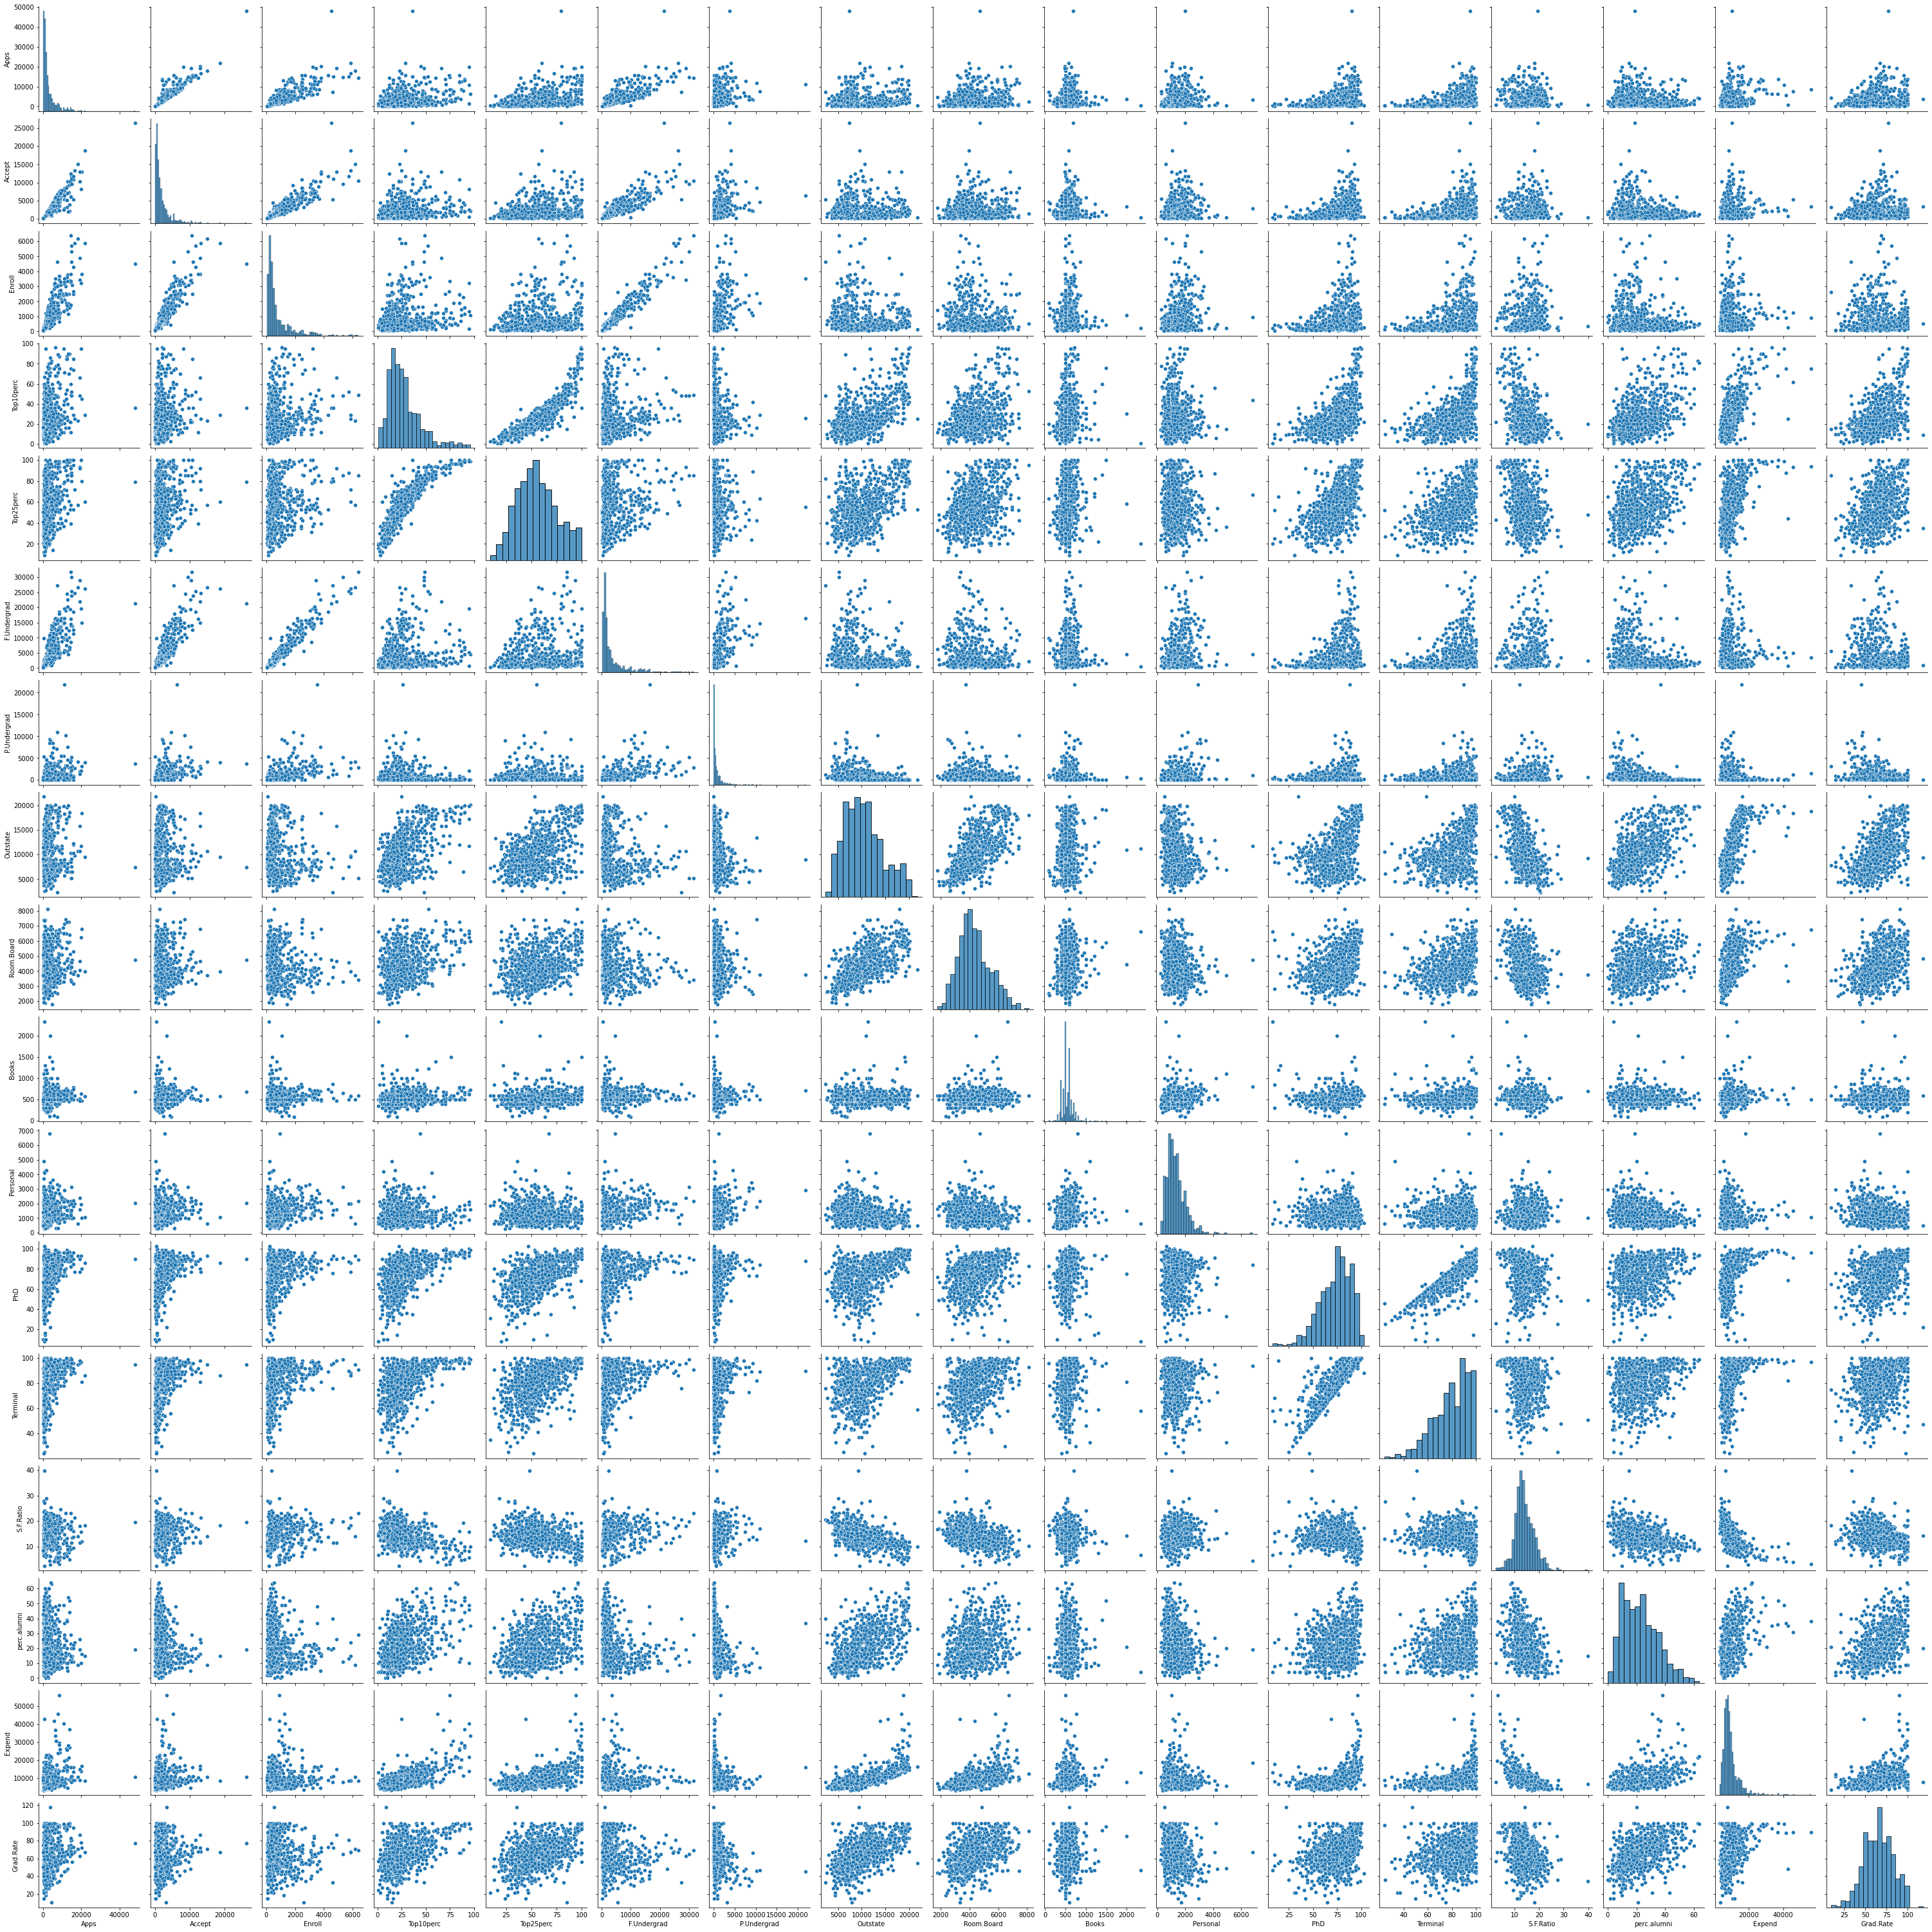

In [31]:
plt.figure(figsize=(20,20))
sns.pairplot(df)

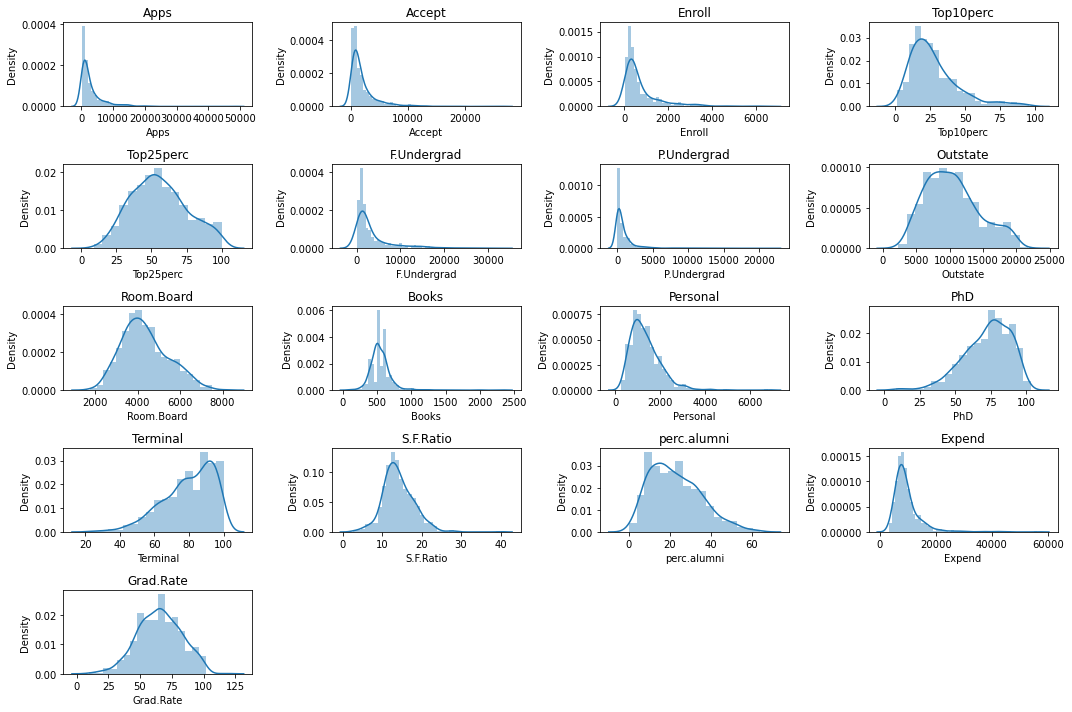

In [32]:
plt.figure(figsize=(15,10))
for i,x in enumerate(df.select_dtypes(exclude='object').columns):
    plt.subplot(5,4,i+1)
    sns.distplot(df[x])
    plt.title('{}'.format(x))
    plt.tight_layout()

Few distribution has right skewness in them and other half has left skewness and few distributions tend to follow normal distribution.

##### Distributions that follow right skewness :
Apps ,Accept,Enroll,Top10perc,F.undergrad,P.undergrad,Personal,S.F.Ratio,Expend,perc.alumni

##### Distributions that follow left skewness:
Phd,Terminal
##### Distribution that approximately normality:
Top25Perc,Outstate,Room.Board,Grad.Rate

## From the pairplot we can take out the variables with linear relationship 

### Does number of students enrolling a college depends on cost:

Text(0.5, 1.0, 'Enrollment vs Room Cost')

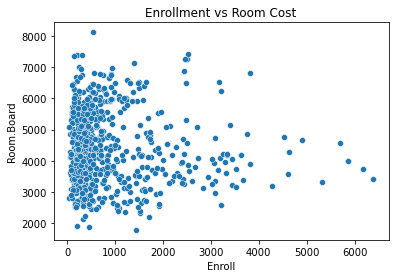

In [33]:
sns.scatterplot(data=df,x='Enroll',y='Room.Board')
plt.title('Enrollment vs Room Cost')

Text(0.5, 1.0, 'Enrollment vs Book Cost')

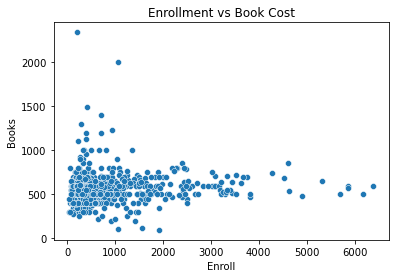

In [34]:
sns.scatterplot(data=df,x='Enroll',y='Books')
plt.title('Enrollment vs Book Cost')

Text(0.5, 1.0, 'Enrollment vs Personal Cost')

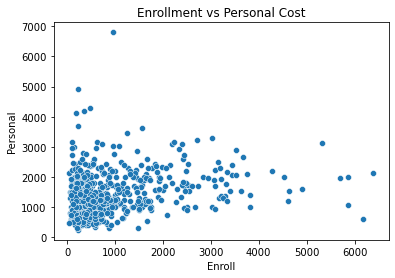

In [35]:
sns.scatterplot(data=df,x='Enroll',y='Personal')
plt.title('Enrollment vs Personal Cost')

Enrollment does not depend on the room charges but it depends on book charges and personal charges, the lesser the charges more the enrollment

Text(0.5, 1.0, 'Enrollment vs Outstate')

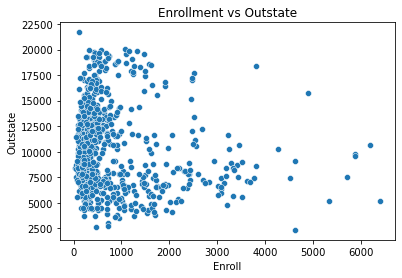

In [36]:
sns.scatterplot(data=df,x='Enroll',y='Outstate')
plt.title('Enrollment vs Outstate')

No significant relationship present between enroll and outstate

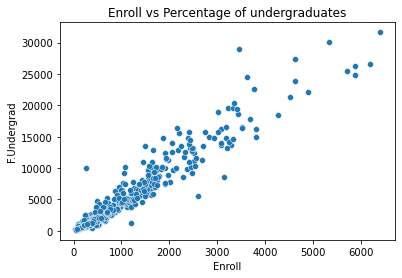

In [37]:
sns.scatterplot(data=df,x='Enroll',y='F.Undergrad')
plt.title('Enroll vs Percentage of undergraduates')
plt.show()

We can clearly see a linear relationship between enrollment and Undergraduates

Text(0.5, 1.0, 'Phd vs Terminal')

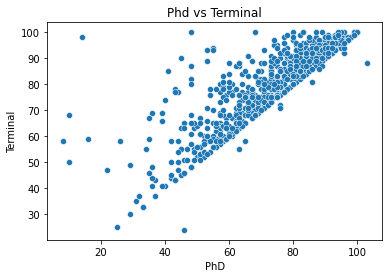

In [115]:
sns.scatterplot(data=df,x='PhD',y='Terminal')
plt.title('Phd vs Terminal')

Text(0.5, 1.0, 'Expenditure vs Outstate')

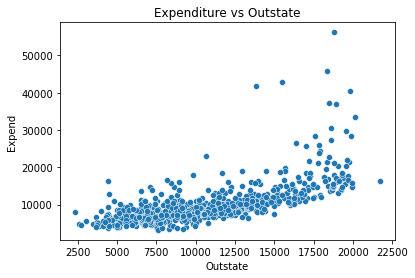

In [39]:
sns.scatterplot(data=df,x='Outstate',y='Expend')
plt.title('Expenditure vs Outstate')

<AxesSubplot:>

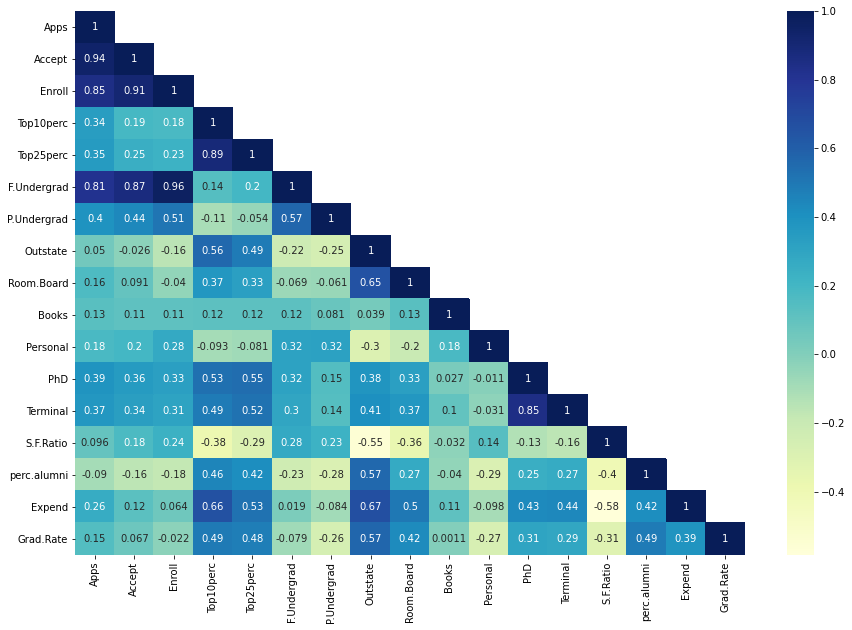

In [40]:
plt.figure(figsize=(15,10))
sns.heatmap(data=df.corr(),annot=True,mask=np.triu(np.ones([17,17]),1),cmap='YlGnBu')

From the plot we can see there is strong correlation present between few variables. There is a strong positive correlation and mild negative correlation present between the varialbles

## 2.2 Is scaling necessary for PCA in this case? Give justification and perform scaling.

Scalling is necessary for PCA in this case study as we can see there is lot of correlation present between the variables so to bring in these unexplained variances into consideration we must centaralise these data points and change the axes in a such a way we have very less correlation.Scaling does the job of centralising the data points and forming the eigen vectors will rotate the axes to minimise the variations.

In [41]:
from scipy.stats import zscore



In [42]:
df_scaled=df.iloc[:,1:].apply(zscore)
df_scaled.head()

Apps    Accept    Enroll  Top10perc  Top25perc  F.Undergrad  \
0 -0.346882 -0.321205 -0.063509  -0.258583  -0.191827    -0.168116   
1 -0.210884 -0.038703 -0.288584  -0.655656  -1.353911    -0.209788   
2 -0.406866 -0.376318 -0.478121  -0.315307  -0.292878    -0.549565   
3 -0.668261 -0.681682 -0.692427   1.840231   1.677612    -0.658079   
4 -0.726176 -0.764555 -0.780735  -0.655656  -0.596031    -0.711924   

   P.Undergrad  Outstate  Room.Board     Books  Personal       PhD  Terminal  \
0    -0.209207 -0.746356   -0.964905 -0.602312  1.270045 -0.163028 -0.115729   
1     0.244307  0.457496    1.909208  1.215880  0.235515 -2.675646 -3.378176   
2    -0.497090  0.201305   -0.554317 -0.905344 -0.259582 -1.204845 -0.931341   
3    -0.520752  0.626633    0.996791 -0.602312 -0.688173  1.185206  1.175657   
4     0.009005 -0.716508   -0.216723  1.518912  0.235515  0.204672 -0.523535   

   S.F.Ratio  perc.alumni    Expend  Grad.Rate  
0   1.013776    -0.867574 -0.501910  -0.318252  
1  -0.477704    -0.544572  0.166110  -0.551262  
2  -0.300749     0.585935 -0.177290  -0.667767  
3  -1.615274     1.151188  1.792851  -0.376504  
4  -0.553542    -1.675079  0.241803  -2.939613

### 2.3 Comment on the comparison between the covariance and the correlation matrices from this data.[on scaled data]

In [116]:
df_scaled.cov()

Apps    Accept    Enroll  Top10perc  Top25perc  F.Undergrad  \
Apps         1.001289  0.944666  0.847913   0.339270   0.352093     0.815540   
Accept       0.944666  1.001289  0.912811   0.192695   0.247795     0.875350   
Enroll       0.847913  0.912811  1.001289   0.181527   0.227037     0.965883   
Top10perc    0.339270  0.192695  0.181527   1.001289   0.893144     0.141471   
Top25perc    0.352093  0.247795  0.227037   0.893144   1.001289     0.199702   
F.Undergrad  0.815540  0.875350  0.965883   0.141471   0.199702     1.001289   
P.Undergrad  0.398777  0.441839  0.513730  -0.105492  -0.053646     0.571247   
Outstate     0.050224 -0.025788 -0.155678   0.563055   0.490024    -0.216020   
Room.Board   0.165152  0.091016 -0.040284   0.371959   0.331917    -0.068979   
Books        0.132729  0.113672  0.112856   0.119012   0.115676     0.115699   
Personal     0.178961  0.201248  0.281291  -0.093437  -0.080914     0.317608   
PhD          0.391201  0.356216  0.331896   0.532513   0.546566     0.318747   
Terminal     0.369968  0.338018  0.308671   0.491768   0.525425     0.300406   
S.F.Ratio    0.095756  0.176456  0.237577  -0.385370  -0.295009     0.280064   
perc.alumni -0.090342 -0.160196 -0.181027   0.456072   0.418403    -0.229758   
Expend       0.259927  0.124878  0.064252   0.661765   0.528127     0.018676   
Grad.Rate    0.146944  0.067399 -0.022370   0.495627   0.477896    -0.078875   

             P.Undergrad  Outstate  Room.Board     Books  Personal       PhD  \
Apps            0.398777  0.050224    0.165152  0.132729  0.178961  0.391201   
Accept          0.441839 -0.025788    0.091016  0.113672  0.201248  0.356216   
Enroll          0.513730 -0.155678   -0.040284  0.112856  0.281291  0.331896   
Top10perc      -0.105492  0.563055    0.371959  0.119012 -0.093437  0.532513   
Top25perc      -0.053646  0.490024    0.331917  0.115676 -0.080914  0.546566   
F.Undergrad     0.571247 -0.216020   -0.068979  0.115699  0.317608  0.318747   
P.Undergrad     1.001289 -0.253839   -0.061405  0.081304  0.320294  0.149306   
Outstate       -0.253839  1.001289    0.655100  0.038905 -0.299472  0.383476   
Room.Board     -0.061405  0.655100    1.001289  0.128128 -0.199685  0.329627   
Books           0.081304  0.038905    0.128128  1.001289  0.179526  0.026940   
Personal        0.320294 -0.299472   -0.199685  0.179526  1.001289 -0.010950   
PhD             0.149306  0.383476    0.329627  0.026940 -0.010950  1.001289   
Terminal        0.142086  0.408509    0.375022  0.100084 -0.030653  0.850682   
S.F.Ratio       0.232830 -0.555536   -0.363095 -0.031970  0.136521 -0.130698   
perc.alumni    -0.281154  0.566992    0.272714 -0.040260 -0.286337  0.249330   
Expend         -0.083676  0.673646    0.502386  0.112554 -0.098018  0.433319   
Grad.Rate      -0.257332  0.572026    0.425489  0.001062 -0.269691  0.305431   

             Terminal  S.F.Ratio  perc.alumni    Expend  Grad.Rate  
Apps         0.369968   0.095756    -0.090342  0.259927   0.146944  
Accept       0.338018   0.176456    -0.160196  0.124878   0.067399  
Enroll       0.308671   0.237577    -0.181027  0.064252  -0.022370  
Top10perc    0.491768  -0.385370     0.456072  0.661765   0.495627  
Top25perc    0.525425  -0.295009     0.418403  0.528127   0.477896  
F.Undergrad  0.300406   0.280064    -0.229758  0.018676  -0.078875  
P.Undergrad  0.142086   0.232830    -0.281154 -0.083676  -0.257332  
Outstate     0.408509  -0.555536     0.566992  0.673646   0.572026  
Room.Board   0.375022  -0.363095     0.272714  0.502386   0.425489  
Books        0.100084  -0.031970    -0.040260  0.112554   0.001062  
Personal    -0.030653   0.136521    -0.286337 -0.098018  -0.269691  
PhD          0.850682  -0.130698     0.249330  0.433319   0.305431  
Terminal     1.001289  -0.160310     0.267475  0.439365   0.289900  
S.F.Ratio   -0.160310   1.001289    -0.403448 -0.584584  -0.307106  
perc.alumni  0.267475  -0.403448     1.001289  0.418250   0.491530  
Expend       0.439365  -0.58458

In [117]:
df_scaled.corr()

Apps    Accept    Enroll  Top10perc  Top25perc  F.Undergrad  \
Apps         1.000000  0.943451  0.846822   0.338834   0.351640     0.814491   
Accept       0.943451  1.000000  0.911637   0.192447   0.247476     0.874223   
Enroll       0.846822  0.911637  1.000000   0.181294   0.226745     0.964640   
Top10perc    0.338834  0.192447  0.181294   1.000000   0.891995     0.141289   
Top25perc    0.351640  0.247476  0.226745   0.891995   1.000000     0.199445   
F.Undergrad  0.814491  0.874223  0.964640   0.141289   0.199445     1.000000   
P.Undergrad  0.398264  0.441271  0.513069  -0.105356  -0.053577     0.570512   
Outstate     0.050159 -0.025755 -0.155477   0.562331   0.489394    -0.215742   
Room.Board   0.164939  0.090899 -0.040232   0.371480   0.331490    -0.068890   
Books        0.132559  0.113525  0.112711   0.118858   0.115527     0.115550   
Personal     0.178731  0.200989  0.280929  -0.093316  -0.080810     0.317200   
PhD          0.390697  0.355758  0.331469   0.531828   0.545862     0.318337   
Terminal     0.369491  0.337583  0.308274   0.491135   0.524749     0.300019   
S.F.Ratio    0.095633  0.176229  0.237271  -0.384875  -0.294629     0.279703   
perc.alumni -0.090226 -0.159990 -0.180794   0.455485   0.417864    -0.229462   
Expend       0.259592  0.124717  0.064169   0.660913   0.527447     0.018652   
Grad.Rate    0.146755  0.067313 -0.022341   0.494989   0.477281    -0.078773   

             P.Undergrad  Outstate  Room.Board     Books  Personal       PhD  \
Apps            0.398264  0.050159    0.164939  0.132559  0.178731  0.390697   
Accept          0.441271 -0.025755    0.090899  0.113525  0.200989  0.355758   
Enroll          0.513069 -0.155477   -0.040232  0.112711  0.280929  0.331469   
Top10perc      -0.105356  0.562331    0.371480  0.118858 -0.093316  0.531828   
Top25perc      -0.053577  0.489394    0.331490  0.115527 -0.080810  0.545862   
F.Undergrad     0.570512 -0.215742   -0.068890  0.115550  0.317200  0.318337   
P.Undergrad     1.000000 -0.253512   -0.061326  0.081200  0.319882  0.149114   
Outstate       -0.253512  1.000000    0.654256  0.038855 -0.299087  0.382982   
Room.Board     -0.061326  0.654256    1.000000  0.127963 -0.199428  0.329202   
Books           0.081200  0.038855    0.127963  1.000000  0.179295  0.026906   
Personal        0.319882 -0.299087   -0.199428  0.179295  1.000000 -0.010936   
PhD             0.149114  0.382982    0.329202  0.026906 -0.010936  1.000000   
Terminal        0.141904  0.407983    0.374540  0.099955 -0.030613  0.849587   
S.F.Ratio       0.232531 -0.554821   -0.362628 -0.031929  0.136345 -0.130530   
perc.alumni    -0.280792  0.566262    0.272363 -0.040208 -0.285968  0.249009   
Expend         -0.083568  0.672779    0.501739  0.112409 -0.097892  0.432762   
Grad.Rate      -0.257001  0.571290    0.424942  0.001061 -0.269344  0.305038   

             Terminal  S.F.Ratio  perc.alumni    Expend  Grad.Rate  
Apps         0.369491   0.095633    -0.090226  0.259592   0.146755  
Accept       0.337583   0.176229    -0.159990  0.124717   0.067313  
Enroll       0.308274   0.237271    -0.180794  0.064169  -0.022341  
Top10perc    0.491135  -0.384875     0.455485  0.660913   0.494989  
Top25perc    0.524749  -0.294629     0.417864  0.527447   0.477281  
F.Undergrad  0.300019   0.279703    -0.229462  0.018652  -0.078773  
P.Undergrad  0.141904   0.232531    -0.280792 -0.083568  -0.257001  
Outstate     0.407983  -0.554821     0.566262  0.672779   0.571290  
Room.Board   0.374540  -0.362628     0.272363  0.501739   0.424942  
Books        0.099955  -0.031929    -0.040208  0.112409   0.001061  
Personal    -0.030613   0.136345    -0.285968 -0.097892  -0.269344  
PhD          0.849587  -0.130530     0.249009  0.432762   0.305038  
Terminal     1.000000  -0.160104     0.267130  0.438799   0.289527  
S.F.Ratio   -0.160104   1.000000    -0.402929 -0.583832  -0.306710  
perc.alumni  0.267130  -0.402929     1.000000  0.417712   0.490898  
Expend       0.438799  -0.58383

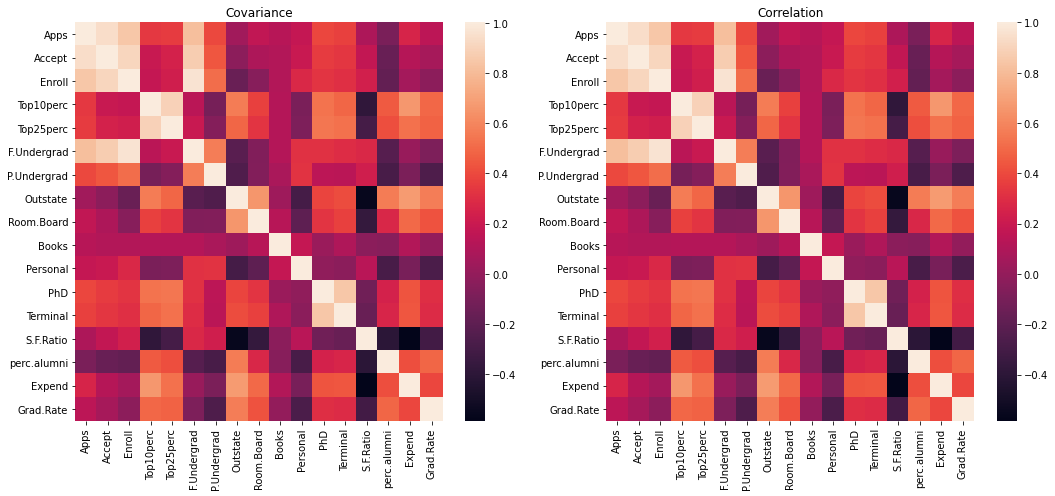

In [122]:
plt.figure(figsize=(15,7))

plt.subplot(1,2,1)
plt.title('Covariance')
sns.heatmap(df_scaled.cov())
plt.subplot(1,2,2)
plt.title('Correlation')
sns.heatmap(df_scaled.corr())
plt.tight_layout()


covariance just shows the strength of the relationship between variables it ranges from  -$\infty$ to + $\infty$
where as the correlation matrix not only tell the strength but also the direction. It ranges from -1 to 1 where as in this case after scaling the covariance matrix and correlation matrix is almost equal the plot looks identical.

### 2.4 Check the dataset for outliers before and after scaling. What insight do you derive here? 

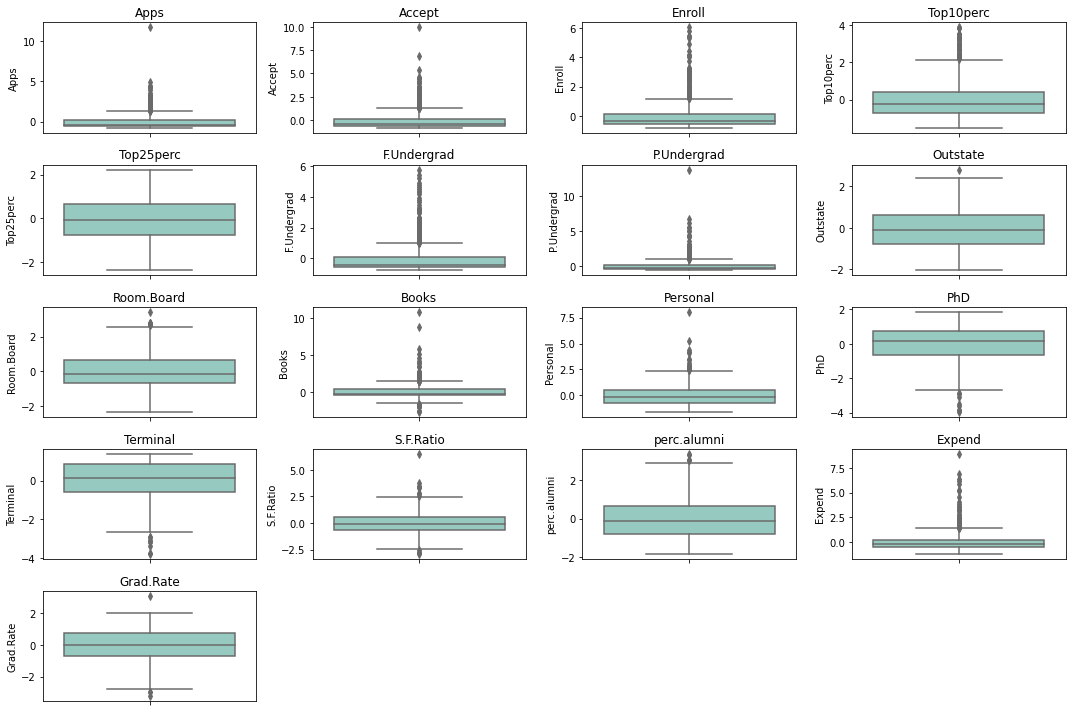

In [132]:
plt.figure(figsize=(15,10))
for i,x in enumerate(df_scaled.select_dtypes(exclude='object').columns):
    plt.subplot(5,4,i+1)
    sns.boxplot(y=df_scaled[x],palette=sns.color_palette("Set3"))
    plt.title('{}'.format(x))
    plt.tight_layout()

We can see that scaling does not treat the outliers , outliers are present before and after the scaling

### 2.5 Extract the eigenvalues and eigenvectors. [Using Sklearn PCA Print Both]

To do the pca we must check for correlation , from the plots we can say correlation exists between the variables but to prove it statistically we can do a bartlett sphericity test.
For the test

$H_{0}$:No significant correlation present

$H_{1}$:Significant correlation present

In [47]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity,calculate_kmo

In [48]:
chi,pvalue=calculate_bartlett_sphericity(df_scaled)
pvalue

0.0

Since the pvalue is 0 we can reject the null hypothesis and conclude statisticlly we have enough evidence to prove that there is a significant correlation present

In [49]:
kmo_all,kmo_model=calculate_kmo(df_scaled)
kmo_model

0.8131251200373522

KMO test is to check for adequacy of the data to do pca/ dimension reduction as the value is greater than 0.8 we can proceed with pca construction

In [134]:
from sklearn.decomposition import PCA
pca=PCA(n_components=17)
pca_transformed=pca.fit_transform(df_scaled)
pca.components_#eigen vectors

array([[ 2.48765602e-01,  2.07601502e-01,  1.76303592e-01,
         3.54273947e-01,  3.44001279e-01,  1.54640962e-01,
         2.64425045e-02,  2.94736419e-01,  2.49030449e-01,
         6.47575181e-02, -4.25285386e-02,  3.18312875e-01,
         3.17056016e-01, -1.76957895e-01,  2.05082369e-01,
         3.18908750e-01,  2.52315654e-01],
       [ 3.31598227e-01,  3.72116750e-01,  4.03724252e-01,
        -8.24118211e-02, -4.47786551e-02,  4.17673774e-01,
         3.15087830e-01, -2.49643522e-01, -1.37808883e-01,
         5.63418434e-02,  2.19929218e-01,  5.83113174e-02,
         4.64294477e-02,  2.46665277e-01, -2.46595274e-01,
        -1.31689865e-01, -1.69240532e-01],
       [-6.30921033e-02, -1.01249056e-01, -8.29855709e-02,
         3.50555339e-02, -2.41479376e-02, -6.13929764e-02,
         1.39681716e-01,  4.65988731e-02,  1.48967389e-01,
         6.77411649e-01,  4.99721120e-01, -1.27028371e-01,
        -6.60375454e-02, -2.89848401e-01, -1.46989274e-01,
         2.26743985e-01, -2.0

In [51]:
#eigen values
pca.explained_variance_

array([5.45052162, 4.48360686, 1.17466761, 1.00820573, 0.93423123,
       0.84849117, 0.6057878 , 0.58787222, 0.53061262, 0.4043029 ,
       0.31344588, 0.22061096, 0.16779415, 0.1439785 , 0.08802464,
       0.03672545, 0.02302787])

### 2.6 Perform PCA and export the data of the Principal Component (eigenvectors) into a data frame with the original features

In [52]:
df_extracted=pd.DataFrame(pca.components_.T,columns=['PC1','PC2', 'PC3', 'PC4', 'PC5', 'PC6',
                                               'PC7','PC8', 'PC9', 'PC10', 'PC11', 'PC12',
                                                     'PC13', 'PC14', 'PC15', 'PC16', 'PC17'],index=df_scaled.columns)
df_extracted

PC1       PC2       PC3       PC4       PC5       PC6  \
Apps         0.248766  0.331598 -0.063092  0.281311  0.005741 -0.016237   
Accept       0.207602  0.372117 -0.101249  0.267817  0.055786  0.007535   
Enroll       0.176304  0.403724 -0.082986  0.161827 -0.055694 -0.042558   
Top10perc    0.354274 -0.082412  0.035056 -0.051547 -0.395434 -0.052693   
Top25perc    0.344001 -0.044779 -0.024148 -0.109767 -0.426534  0.033092   
F.Undergrad  0.154641  0.417674 -0.061393  0.100412 -0.043454 -0.043454   
P.Undergrad  0.026443  0.315088  0.139682 -0.158558  0.302385 -0.191199   
Outstate     0.294736 -0.249644  0.046599  0.131291  0.222532 -0.030000   
Room.Board   0.249030 -0.137809  0.148967  0.184996  0.560919  0.162755   
Books        0.064758  0.056342  0.677412  0.087089 -0.127289  0.641055   
Personal    -0.042529  0.219929  0.499721 -0.230711 -0.222311 -0.331398   
PhD          0.318313  0.058311 -0.127028 -0.534725  0.140166  0.091256   
Terminal     0.317056  0.046429 -0.066038 -0.519443  0.204720  0.154928   
S.F.Ratio   -0.176958  0.246665 -0.289848 -0.161189 -0.079388  0.487046   
perc.alumni  0.205082 -0.246595 -0.146989  0.017314 -0.216297 -0.047340   
Expend       0.318909 -0.131690  0.226744  0.079273  0.075958 -0.298119   
Grad.Rate    0.252316 -0.169241 -0.208065  0.269129 -0.109268  0.216163   

                  PC7       PC8       PC9      PC10      PC11      PC12  \
Apps        -0.042486 -0.103090 -0.090227  0.052510  0.043046  0.024071   
Accept      -0.012950 -0.056271 -0.177865  0.041140 -0.058406 -0.145102   
Enroll      -0.027693  0.058662 -0.128561  0.034488 -0.069399  0.011143   
Top10perc   -0.161332 -0.122678  0.341100  0.064026 -0.008105  0.038554   
Top25perc   -0.118486 -0.102492  0.403712  0.014549 -0.273128 -0.089352   
F.Undergrad -0.025076  0.078890 -0.059442  0.020847 -0.081158  0.056177   
P.Undergrad  0.061042  0.570784  0.560673 -0.223106  0.100693 -0.063536   
Outstate     0.108529  0.009846 -0.004573  0.186675  0.143221 -0.823444   
Room.Board   0.209744 -0.221453  0.275023  0.298324 -0.359322  0.354560   
Books       -0.149692  0.213293 -0.133663 -0.082029  0.031940 -0.028159   
Personal     0.633790 -0.232661 -0.094469  0.136028 -0.018578 -0.039264   
PhD         -0.001096 -0.077040 -0.185182 -0.123452  0.040372  0.023222   
Terminal    -0.028477 -0.012161 -0.254938 -0.088578 -0.058973  0.016485   
S.F.Ratio    0.219259 -0.083605  0.274544  0.472045  0.445001 -0.011026   
perc.alumni  0.243321  0.678524 -0.255335  0.423000 -0.130728  0.182661   
Expend      -0.226584 -0.054159 -0.049139  0.132286  0.692089  0.325982   
Grad.Rate    0.559944 -0.005336  0.041904 -0.590271  0.219839  0.122107   

                 PC13      PC14      PC15      PC16      PC17  
Apps         0.595831  0.080633  0.133406  0.459139  0.358970  
Accept       0.292642  0.033467 -0.145498 -0.518569 -0.543427  
Enroll      -0.444638 -0.085697  0.029590 -0.404318  0.609651  
Top10perc    0.001023 -0.107828  0.697723 -0.148739 -0.144986  
Top25perc    0.021884  0.151742 -0.617275  0.051868  0.080348  
F.Undergrad -0.523622 -0.056373  0.009916  0.560363 -0.414705  
P.Undergrad  0.125998  0.019286  0.020952 -0.052731  0.009018  
Outstate    -0.141856 -0.034012  0.038354  0.101595  0.050900  
Room.Board  -0.069749 -0.058429  0.003402 -0.025929  0.001146  
Books        0.011438 -0.066849 -0.009439  0.002883  0.000773  
Personal     0.039455  0.027529 -0.003090 -0.012890 -0.001114  
PhD          0.127696 -0.691126 -0.112056  0.029808  0.013813  
Terminal    -0.058313  0.671009  0.158910 -0.027076  0.006209  
S.F.Ratio   -0.017715  0.041374 -0.020899 -0.021248 -0.002222  
perc.alumni  0.104088 -0.027154 -0.008418  0.003334 -0.019187  
Expend      -0.093746  0.073123 -0.227742 -0.043880 -0.035310  
Grad.Rate   -0.069197  0.036477 -0.003394 -0.005008 -0.013071

In [137]:
df_extracted.to_csv('Extracted.csv')

### 2.7 Write down the explicit form of the first PC (in terms of the eigenvectors. Use values with two places of decimals only). [hint: write the linear equation of PC in terms of eigenvectors and corresponding features]

In [54]:
df_extracted['PC1']

Apps           0.248766
Accept         0.207602
Enroll         0.176304
Top10perc      0.354274
Top25perc      0.344001
F.Undergrad    0.154641
P.Undergrad    0.026443
Outstate       0.294736
Room.Board     0.249030
Books          0.064758
Personal      -0.042529
PhD            0.318313
Terminal       0.317056
S.F.Ratio     -0.176958
perc.alumni    0.205082
Expend         0.318909
Grad.Rate      0.252316
Name: PC1, dtype: float64

In [82]:
a=df_extracted['PC1']
string=''
for x in a.index:
    string+=' {}{}*{} '.format('+' if a[x] > 0 else '',round(a[x],3),x)
print(string)

 +0.249*Apps  +0.208*Accept  +0.176*Enroll  +0.354*Top10perc  +0.344*Top25perc  +0.155*F.Undergrad  +0.026*P.Undergrad  +0.295*Outstate  +0.249*Room.Board  +0.065*Books  -0.043*Personal  +0.318*PhD  +0.317*Terminal  -0.177*S.F.Ratio  +0.205*perc.alumni  +0.319*Expend  +0.252*Grad.Rate 


E1= 0.249*Apps  +0.208*Accept  +0.176*Enroll  +0.354*Top10perc  +0.344*Top25perc  +0.155*F.Undergrad  +0.026*P.Undergrad  +0.295*Outstate  +0.249*Room.Board  +0.065*Books  -0.043*Personal  +0.318*PhD  +0.317*Terminal  -0.177*S.F.Ratio  +0.205*perc.alumni  +0.319*Expend  +0.252*Grad.Rate

### 2.8 Consider the cumulative values of the eigenvalues. How does it help you to decide on the optimum number of principal components? What do the eigenvectors indicate? 

In [229]:
np.cumsum(pca.explained_variance_ratio_)

array([0.32020628, 0.58360843, 0.65261759, 0.71184748, 0.76673154,
       0.81657854, 0.85216726, 0.88670347, 0.91787581, 0.94162773,
       0.96004199, 0.9730024 , 0.98285994, 0.99131837, 0.99648962,
       0.99864716, 1.        ])

Cumulative sum of explained variance explains the total covariance captured cumulatively by each vectors. from the output we can see 7 vectors captures 85% of the total variance from the original data and 9 vectors captures a total of 91% of variances. 
With the help of cumulative sum of variance captured we can decide the number of eigen vectors needed .If we need 85 % of the variance to be captured we can go ahead with 7 vectors.

Each eigen vector indicates the direction of the new dimension created in mathematical space for the data points such that the covariance is reduced.In other words we can say its a mathematical representaion of all the columns in such a way that the noise (covariance) is reduced 

### 2.9 Explain the business implication of using the Principal Component Analysis for this case study. How may PCs help in the further analysis? 

In this case study the data set has 17 columns with covariance existing between lots of variables this might reduce the signal to noise ratio unwanted covariance in the dataset will impair the performance of the model while genralising. To alter these effects we need to reduce the covariances between the independant variables also we can reduce the dimensions to reduce the S/N ratio.PCA helps in reducing the dimension without losing any information and captures the variances amoung the variables.A model needs to learn effectively and to do that with the minimalistic data without much of a loss and noise pca forms the eigen vectors with which we can proceed with the furthur analysis. From the explanined variance we can see that 7 eigen vectors have captured 85% of the total variance present in the data so we can conclude that 7 vectors is enough to proceed with the analysis